In [2]:
# 匯入常用套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP 與模型相關
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#載入資料
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#保留欄位
train_df = train_df[["text", "target"]]
test_df = test_df[["text", "id"]]

# 顯示前幾筆資料
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
# 定義清理函數
def clean_text(text):
    text = str(text).lower()                           
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'<.*?>', '', text)                  
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)                    
    return text

# 套用清理
train_df['text_clean'] = train_df['text'].apply(clean_text)
test_df['text_clean'] = test_df['text'].apply(clean_text)

train_df[['text', 'text_clean']].head()


,text,text_clean
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


In [4]:
# 建立 TF-IDF 向量
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# 對訓練與測試資料擬合與轉換
X_train_tfidf = tfidf.fit_transform(train_df['text_clean'])
X_test_tfidf = tfidf.transform(test_df['text_clean'])

# 標籤
y_train = train_df['target']


In [9]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_tr, y_tr)

# 預測驗證集
y_pred = rf_model.predict(X_val)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       874
           1       0.77      0.67      0.72       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



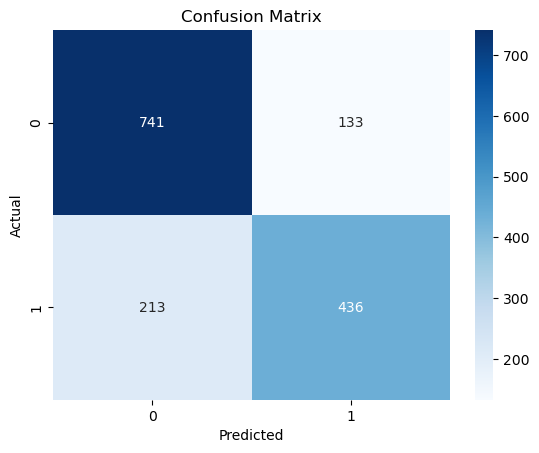

In [6]:
# 評估模型表現
print("Classification Report:")
print(classification_report(y_val, y_pred))

# 混淆矩陣
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 對測試集進行預測
test_preds = rf_model.predict(X_test_tfidf)

# 產生提交檔案
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': test_preds
})

submission.to_csv('submission.csv', index=False)
print("已輸出 submission.csv")


已輸出 submission.csv
